In [29]:
!pip install tensorflow-addons

In [30]:
!pip install vit-keras

In [46]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.vgg19 import VGG19
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#########################################################

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer

MCC_scorer = make_scorer(matthews_corrcoef)
#######################################################

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [35]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1['DIAGN'] = data1['DIAGN'].replace({2: 1})
data1['DIAGN'] = data1['DIAGN'].replace({3: 1})
data1['DIAGN'] = data1['DIAGN'].replace({4: 1})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    303
1    168
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_Anon/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_Anon/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_Anon/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_Anon/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_Anon/Case 003/,0
...,...,...,...,...,...
567,Case 248,2,20230418104244.jpg,PruebasCITOBOT_Anon/Case 248/,0
568,Case 249,2,20230418103711.jpg,PruebasCITOBOT_Anon/Case 249/,1
569,Case 249,2,20230418103638.jpg,PruebasCITOBOT_Anon/Case 249/,1
570,Case 250,2,20230418093117.jpg,PruebasCITOBOT_Anon/Case 250/,0


In [36]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({2: 1})
data2['DIAGN'] = data2['DIAGN'].replace({3: 1})
print(data2['DIAGN'].value_counts())
data2

1    597
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,1
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,1


In [37]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
dataC1 = data3[data3['DIAGN'] == 0]
dataC2 = data3[data3['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=531)
data_aleatoria2 = dataC2.sample(n=58)
data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1     58
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
46839,P357250,6,I271965_C1.jpg,training_SEG/NHS/,0
76647,P899409,5,I531686_C1.jpg,training_SEG/NHS/,0
139,P345767,2,I470539.jpg,training_SEG/Biopsy_Study/,0
55276,P508647,4,I829041_C1.jpg,training_SEG/NHS/,0
62142,P634834,1,I423672_C2.jpg,training_SEG/NHS/,0
...,...,...,...,...,...
5,P111612,5,I545805.jpg,training_SEG/Biopsy_Study/,1
26,P157999,2,I676186.jpg,training_SEG/Biopsy_Study/,1
269,P585444,3,I657464.jpg,training_SEG/Biopsy_Study/,1
454,P884769,2,I474933.jpg,training_SEG/Biopsy_Study/,1


In [38]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC1 = data4[data4['DIAGN'] == 0]
dataC2 = data4[data4['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=244)
data_aleatoria2 = dataC2.sample(n=244)
data4 = pd.concat([data_aleatoria, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

0    244
1    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
122,0,0,349.jpg,Kaggle_SEG/Type_1/,0
127,0,0,376.jpg,Kaggle_SEG/Type_1/,0
62,0,0,1344.jpg,Kaggle_SEG/Type_1/,0
17,0,0,1077.jpg,Kaggle_SEG/Type_1/,0
237,0,0,965.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
754,0,0,528.jpg,Kaggle_SEG/Type_2/,1
1384,0,0,757.jpg,Kaggle_SEG/Type_3/,1
492,0,0,1399.jpg,Kaggle_SEG/Type_2/,1
626,0,0,305.jpg,Kaggle_SEG/Type_2/,1


In [39]:
data = pd.concat([data2, data3])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
5,P111612,5,I545805.jpg,training_SEG/Biopsy_Study/,1
26,P157999,2,I676186.jpg,training_SEG/Biopsy_Study/,1
269,P585444,3,I657464.jpg,training_SEG/Biopsy_Study/,1
454,P884769,2,I474933.jpg,training_SEG/Biopsy_Study/,1


In [40]:
#Distribuir clases (2)
print(data['DIAGN'].value_counts())

0    655
1    655
Name: DIAGN, dtype: int64


In [41]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [42]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [256, 256])
  #img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  img = tf.image.random_flip_left_right(img)  # voltear horizontalmente aleatoriamente
  img = tf.image.random_brightness(img, max_delta=0.1)  # cambiar brillo aleatoriamente
  img = tf.image.random_contrast(img, lower=0.9, upper=1.1)  # cambiar contraste aleatoriamente
  img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
  img = tf.image.random_saturation(img, lower=0.7, upper=1.3)
  img = tf.image.random_hue(img, max_delta=0.1)
  img = tf.keras.applications.resnet50.preprocess_input(img)
  return img

In [43]:
#Cargar los path de las imagenes para el pipeline
dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
path_data = dataPathDrive + data["PATH"] + data['IMAGE_ID']
path_data = np.array(path_data)

#Convertir en tensores
data_tensor = tf.data.Dataset.from_tensor_slices(path_data)

#Procesar y Cargar Imagenes
data_tensor = data_tensor.map(process_image)

dataset = tf.data.Dataset.from_tensor_slices(to_categorical(data['DIAGN'], 2))
dataset = tf.data.Dataset.zip((data_tensor,dataset))

DATA = dataset.batch(batch_size=64)

In [44]:
#Transformers ViT
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.models import Model
from keras.optimizers import Adam
from vit_keras import vit, utils

# Crear el modelo ViT
input_shape = (256, 256, 3)
inputs = Input(shape=input_shape)
vit_model = vit.vit_b16(
    image_size=256,
    activation='softmax',
    pretrained=True,
    include_top=False,
    pretrained_top=False
)(inputs)

# Crear un nuevo modelo que incluye la capa de entrada y el modelo ViT
modelTransformer = Model(inputs, vit_model)

# Establecer todas las capas del nuevo modelo como no entrenables
for layer in modelTransformer.layers:
    layer.trainable = False

modelTransformer.summary()  # Los parámetros entrenables serán 0

/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  warnings.warn(


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85844736  
                                                                 
Total params: 85844736 (327.47 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 85844736 (327.47 MB)
_________________________________________________________________


In [45]:
feature_extractor = modelTransformer.predict(DATA)

21/21 [==============================] - 1165s 55s/step


In [48]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(1310, 768)


**RandomForest**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  #split_data1, split_data = features_data[:data1.shape[0]], features_data[data1.shape[0]:]
  #x_train, x_test, y_train, y_test = train_test_split(split_data1, data1['DIAGN'], test_size=0.5)
  #x_train = pd.concat([x_train, split_data])
  #y_train = pd.concat([y_train, data2['DIAGN'],data3['DIAGN']])

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  rf = RandomForestClassifier(
      bootstrap= False,
      max_depth= 5,
      max_features= 'sqrt',
      min_samples_leaf= 2,
      min_samples_split= 10,
      n_estimators= 100)
  """
  parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  rf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(rf.best_params_)

  pred = rf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[ 94  32]
 [  9 127]]
Specificity:  0.746031746031746
Sensitivity:  0.9338235294117647
Accuracy:  0.8435114503816794
Precision:  [0.91262136 0.79874214]
Recall:     [0.74603175 0.93382353]
F1score:    [0.8209607  0.86101695]
Iteracion:  2
[[ 85  35]
 [ 17 125]]
Specificity:  0.7083333333333334
Sensitivity:  0.8802816901408451
Accuracy:  0.8015267175572519
Precision:  [0.83333333 0.78125   ]
Recall:     [0.70833333 0.88028169]
F1score:    [0.76576577 0.82781457]
Iteracion:  3
[[ 96  35]
 [ 12 119]]
Specificity:  0.732824427480916
Sensitivity:  0.9083969465648855
Accuracy:  0.8206106870229007
Precision:  [0.88888889 0.77272727]
Recall:     [0.73282443 0.90839695]
F1score:    [0.80334728 0.83508772]
Iteracion:  4
[[107  32]
 [  9 114]]
Specificity:  0.7697841726618705
Sensitivity:  0.926829268292683
Accuracy:  0.8435114503816794
Precision:  [0.92241379 0.78082192]
Recall:     [0.76978417 0.92682927]
F1score:    [0.83921569 0.84758364]
Iteracion:  5
[[103  38]
 [  6 115]]
Sp

**LogisticRegression**

In [50]:
from sklearn.linear_model import LogisticRegression

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  clf = LogisticRegression(
      C= 1,
      class_weight= 'balanced',
      max_iter= 100,
      penalty= 'l2',
      solver= 'saga')
  """
  parameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
  }

  clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  clf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(clf.best_params_)

  pred = clf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[102  32]
 [ 47  81]]
Specificity:  0.7611940298507462
Sensitivity:  0.6328125
Accuracy:  0.6984732824427481
Precision:  [0.68456376 0.71681416]
Recall:     [0.76119403 0.6328125 ]
F1score:    [0.72084806 0.67219917]
Iteracion:  2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[119  21]
 [ 43  79]]
Specificity:  0.85
Sensitivity:  0.6475409836065574
Accuracy:  0.7557251908396947
Precision:  [0.7345679 0.79     ]
Recall:     [0.85       0.64754098]
F1score:    [0.78807947 0.71171171]
Iteracion:  3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[102  33]
 [ 47  80]]
Specificity:  0.7555555555555555
Sensitivity:  0.6299212598425197
Accuracy:  0.6946564885496184
Precision:  [0.68456376 0.7079646 ]
Recall:     [0.75555556 0.62992126]
F1score:    [0.71830986 0.66666667]
Iteracion:  4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[116  17]
 [ 49  80]]
Specificity:  0.8721804511278195
Sensitivity:  0.6201550387596899
Accuracy:  0.7480916030534351
Precision:  [0.7030303  0.82474227]
Recall:     [0.87218045 0.62015504]
F1score:    [0.77852349 0.7079646 ]
Iteracion:  5
[[100  29]
 [ 47  86]]
Specificity:  0.7751937984496124
Sensitivity:  0.6466165413533834
Accuracy:  0.7099236641221374
Precision:  [0.68027211 0.74782609]
Recall:     [0.7751938  0.64661654]
F1score:    [0.72463768 0.69354839]
Media
Specificity:  0.8028247669967467  |  Sensitivity:  0.6354092647124301
Accuracy:  0.7213740458015268  |  Precision:  0.7274344945946638  |  Recall:  0.7191170158545883  |  F1score:  0.7182489094352558

Desviacion
Specificity:  0.04851119577714926  |  Sensitivity:  0.010414743845857362
Accuracy:  0.025546871039208423  |  Precision:  0.045648079104031535  |  Recall:  0.09076281784866187  |  F1score:  0.03754574803758978


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**XGBoost**

In [51]:
import xgboost as xgb

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  params = {
    'objective': 'binary:logistic',  # función objetivo para la clasificación binaria
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8  # fracción de características a utilizar para cada árbol
  }

  dtrain = xgb.DMatrix(x_train, label=y_train)
  dtest = xgb.DMatrix(x_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[ 92  40]
 [ 11 119]]
Specificity:  0.696969696969697
Sensitivity:  0.9153846153846154
Accuracy:  0.8053435114503816
Precision:  [0.89320388 0.74842767]
Recall:     [0.6969697  0.91538462]
F1score:    [0.78297872 0.82352941]
Iteracion:  2
[[102  31]
 [ 13 116]]
Specificity:  0.7669172932330827
Sensitivity:  0.8992248062015504
Accuracy:  0.8320610687022901
Precision:  [0.88695652 0.78911565]
Recall:     [0.76691729 0.89922481]
F1score:    [0.82258065 0.84057971]
Iteracion:  3
[[102  31]
 [ 14 115]]
Specificity:  0.7669172932330827
Sensitivity:  0.8914728682170543
Accuracy:  0.8282442748091603
Precision:  [0.87931034 0.78767123]
Recall:     [0.76691729 0.89147287]
F1score:    [0.81927711 0.83636364]
Iteracion:  4
[[ 96  34]
 [ 11 121]]
Specificity:  0.7384615384615385
Sensitivity:  0.9166666666666666
Accuracy:  0.8282442748091603
Precision:  [0.89719626 0.78064516]
Recall:     [0.73846154 0.91666667]
F1score:    [0.81012658 0.84320557]
Iteracion:  5
[[102  34]
 [ 10 116]]


**ViT para clasificar**

In [58]:
#Transformers ViT
import tensorflow_addons as tfa
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.models import Model
from keras.optimizers import Adam
from vit_keras import vit, utils

def modelCompile():
  # Crear el modelo ViT
  input_shape = (256, 256, 3)
  inputs = Input(shape=input_shape)
  vit_model = vit.vit_b16(
      image_size=256,
      activation='softmax',
      pretrained=True,
      include_top=False,
      pretrained_top=False
  )(inputs)

  # Añadir una capa densa para clasificación binaria
  x = Flatten()(vit_model)
  x = Dense(2, activation='softmax')(x)

  # Crear el modelo final
  model = Model(inputs=inputs, outputs=x)

  # Compilar el modelo
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

model = modelCompile()
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85844736  
                                                                 
 flatten_8 (Flatten)         (None, 768)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 1538      
                                                                 
Total params: 85846274 (327.48 MB)
Trainable params: 85846274 (327.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Iteracion:  1
Epoch 1/150
27/27 [==============================] - 87s 2s/step - loss: 0.5573 - accuracy: 0.8007 - val_loss: 0.5883 - val_accuracy: 0.6762
Epoch 2/150
27/27 [==============================] - 47s 2s/step - loss: 0.4086 - accuracy: 0.8234 - val_loss: 0.3405 - val_accuracy: 0.8476
Epoch 3/150
27/27 [==============================] - 48s 2s/step - loss: 0.3292 - accuracy: 0.8628 - val_loss: 0.3438 - val_accuracy: 0.8476
Epoch 4/150
27/27 [==============================] - 48s 2s/step - loss: 0.2664 - accuracy: 0.8783 - val_loss: 0.3299 - val_accuracy: 0.8429
Epoch 5/150
27/27 [==============================] - 48s 2s/step - loss: 0.2493 - accuracy: 0.8926 - val_loss: 0.3412 - val_accuracy: 0.8476
Epoch 6/150
27/27 [==============================] - 49s 2s/step - loss: 0.2459 - accuracy: 0.8890 - val_loss: 0.3388 - val_accuracy: 0.8476
Epoch 7/150
27/27 [==============================] - 49s 2s/step - loss: 0.2032 - accuracy: 0.9141 - val_loss: 0.4104 - val_accuracy: 0.8571

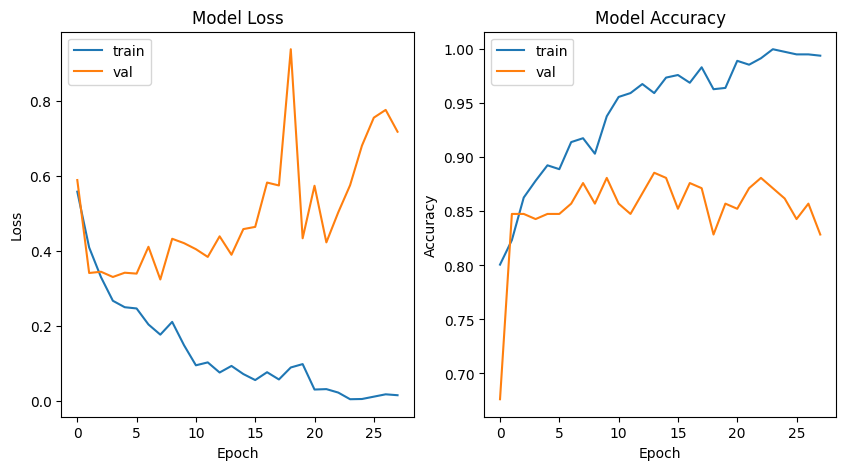

9/9 [==============================] - 8s 540ms/step
[[113  21]
 [ 15 113]]
Specificity:  0.8432835820895522
Sensitivity:  0.8828125
Accuracy:  0.8625954198473282
Precision:  [0.8828125  0.84328358]
Recall:     [0.84328358 0.8828125 ]
F1score:    [0.86259542 0.86259542]
Iteracion:  2


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  warnings.warn(


Epoch 1/150
27/27 [==============================] - 91s 2s/step - loss: 0.6272 - accuracy: 0.7780 - val_loss: 0.3913 - val_accuracy: 0.8429
Epoch 2/150
27/27 [==============================] - 48s 2s/step - loss: 0.3135 - accuracy: 0.8473 - val_loss: 0.3534 - val_accuracy: 0.8714
Epoch 3/150
27/27 [==============================] - 48s 2s/step - loss: 0.3008 - accuracy: 0.8652 - val_loss: 0.4815 - val_accuracy: 0.8190
Epoch 4/150
27/27 [==============================] - 48s 2s/step - loss: 0.3342 - accuracy: 0.8544 - val_loss: 0.4190 - val_accuracy: 0.8238
Epoch 5/150
27/27 [==============================] - 49s 2s/step - loss: 0.2694 - accuracy: 0.8771 - val_loss: 0.3343 - val_accuracy: 0.8571
Epoch 6/150
27/27 [==============================] - 49s 2s/step - loss: 0.2295 - accuracy: 0.8854 - val_loss: 0.4966 - val_accuracy: 0.7429
Epoch 7/150
27/27 [==============================] - 49s 2s/step - loss: 0.2639 - accuracy: 0.8759 - val_loss: 0.3816 - val_accuracy: 0.8333
Epoch 8/150
2

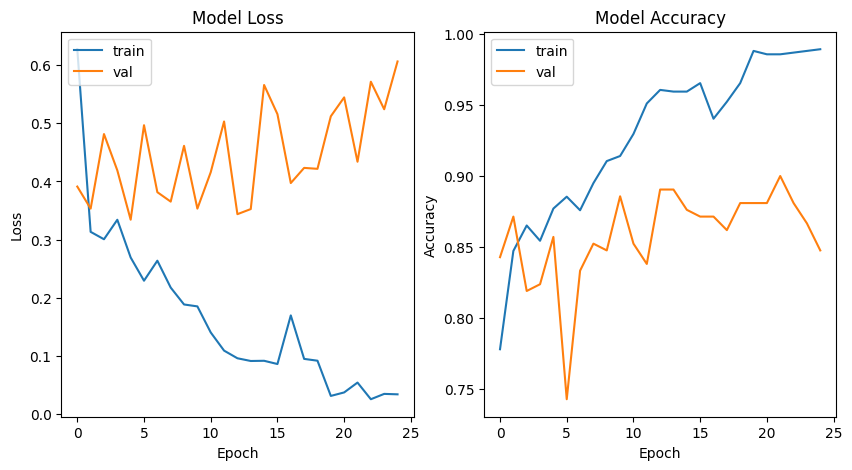

9/9 [==============================] - 8s 515ms/step
[[119  13]
 [ 34  96]]
Specificity:  0.9015151515151515
Sensitivity:  0.7384615384615385
Accuracy:  0.8206106870229007
Precision:  [0.77777778 0.88073394]
Recall:     [0.90151515 0.73846154]
F1score:    [0.83508772 0.80334728]
Iteracion:  3


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  warnings.warn(


Epoch 1/150


ResourceExhaustedError: ignored

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from keras.preprocessing.image import ImageDataGenerator

#Procesar y Cargar Imagenes
def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [256, 256])
  #img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  return img

#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)


HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  #Conjutnos de Train, Validation y Test
  x_trainPath, x_testPath, y_trainPath, y_testPath = train_test_split(data, data['DIAGN'], test_size=0.2)
  x_trainPath, x_valPath, y_trainPath, y_valPath = train_test_split(x_trainPath, y_trainPath, test_size=0.2)

  y_trainPath = np.array(y_trainPath)
  y_testPath = np.array(y_testPath)
  y_valPath = np.array(y_valPath)

  #Cargar los path de las imagenes para el pipeline
  dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
  path_train = dataPathDrive + x_trainPath["PATH"] + x_trainPath['IMAGE_ID']
  path_test = dataPathDrive + x_testPath["PATH"] + x_testPath['IMAGE_ID']
  path_val = dataPathDrive + x_valPath["PATH"] + x_valPath['IMAGE_ID']

  path_train = np.array(path_train)
  path_test = np.array(path_test)
  path_val = np.array(path_val)

  #Convertir en tensores
  data_train = tf.data.Dataset.from_tensor_slices(path_train)
  data_test = tf.data.Dataset.from_tensor_slices(path_test)
  data_val = tf.data.Dataset.from_tensor_slices(path_val)

  #Procesar y Cargar Imagenes
  data_train = data_train.map(process_image)
  data_test = data_test.map(process_image)
  data_val = data_val.map(process_image)

  train = tf.data.Dataset.from_tensor_slices(to_categorical(y_trainPath, 2))
  train = tf.data.Dataset.zip((data_train,train))

  test = tf.data.Dataset.from_tensor_slices(to_categorical(y_testPath, 2))
  test = tf.data.Dataset.zip((data_test,test))

  val = tf.data.Dataset.from_tensor_slices(to_categorical(y_valPath, 2))
  val = tf.data.Dataset.zip((data_val,val))

  AS = train.batch(batch_size=32)
  AST = test.batch(batch_size=32)
  ASV = val.batch(batch_size=32)

  #Aplicar aumento de datos
  x_train = np.array(list(data_train.as_numpy_iterator()))
  y_train = np.array(list(train.as_numpy_iterator()), dtype=object)
  y_train = np.array([y[1] for y in y_train])

  x_val = np.array(list(data_val.as_numpy_iterator()))
  y_val = np.array(list(val.as_numpy_iterator()), dtype=object)
  y_val = np.array([y[1] for y in y_val])

  data_gen_train = datagen.flow(x_train, y_train, batch_size=32)
  data_gen_val = datagen.flow(x_val, y_val, batch_size=32)

  #Cargar Modelo
  model = modelCompile()

  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=20,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(data_gen_train, epochs=150, verbose=1, validation_data= data_gen_val, callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  model.evaluate(AST)
  pred = model.predict(AST)

  y_testPath = list(y_testPath)
  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_testPath, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_testPath,pred_label))
  precVec.append(precision_score(y_testPath,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_testPath,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_testPath,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_testPath,pred_label))
  print("Precision: ",precision_score(y_testPath,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_testPath,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))